In [2]:
import pandas as pd
import sweetviz as sv
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# increase column number display in pandas
pd.set_option('display.max_columns', 100)

def read_csv():
    # read csv and parse dates column to datetime
    df = pd.read_csv("loan.csv", parse_dates=['issue_d'])
    return df

def make_train_test(df):
    # split data to train and test
    sorted_df = df[df['loan_status'] != 'Current'].reset_index(drop=True)
    sorted_df["loan_status"] = sorted_df["loan_status"].map({"Fully Paid": 0, "Charged Off": 1})
    X = sorted_df.drop('loan_status', axis=1)
    y = sorted_df['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    return X_train, X_test, y_train, y_test
    

df = read_csv()
df_train, df_test, df_train_y, df_test_y = make_train_test(df)

# # check data by sweetviz
# my_report = sv.analyze(df_train)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

df_train.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,659611,843638,6300,6300,6300.000000,60 months,13.06%,143.54,C,C2,Nova Technologies,8 years,MORTGAGE,99840.0,Source Verified,Jan-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/22/11 > This loan is to...,home_improvement,New Heating and A/C System,760xx,TX,9.83,0,Mar-85,0,24.0,NaN,7,0,0,0%,15,f,0.0,0.0,8595.940003,8595.94,6300.0,2295.94,0.0,0.0,0.0,Sep-15,861.02,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,406054,454405,10000,10000,9989.853582,36 months,9.32%,319.47,A,A4,OfficeMax,10+ years,RENT,23700.0,Verified,May-09,n,https://lendingclub.com/browse/loanDetail.acti...,I wish to use this loan to consolidate all of...,debt_consolidation,Personal Loan,945xx,CA,10.08,0,Sep-99,0,NaN,NaN,11,0,8596,29.70%,16,f,0.0,0.0,11500.794070,11488.15,10000.0,1500.79,0.0,0.0,0.0,Jun-12,365.11,NaN,Jun-12,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1038943,1268876,25450,25450,25450.000000,60 months,21.28%,692.53,F,F2,Snyder's-Lance,5 years,MORTGAGE,82000.0,Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/29/11 > Pay off Credit ...,major_purchase,Personal Loan,297xx,SC,20.90,0,Apr-00,3,NaN,NaN,11,0,24575,77.50%,29,f,0.0,0.0,26349.287490,26349.29,25450.0,899.29,0.0,0.0,0.0,Feb-12,25657.41,NaN,May-14,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,468920,590987,8000,8000,8000.000000,36 months,13.22%,270.41,C,C2,Federal Aviation Administration,3 years,MORTGAGE,94965.0,Not Verified,Dec-09,n,https://lendingclub.com/browse/loanDetail.acti...,590987 added on 12/14/09 > My job is as an a...,debt_consolidation,Consolidation,440xx,OH,18.55,0,Nov-97,2,NaN,NaN,18,0,37175,82.80%,48,f,0.0,0.0,8920.549580,8920.55,8000.0,920.55,0.0,0.0,0.0,Jan-11,10.38,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,390159,424951,7500,7500,6613.618548,36 months,15.05%,260.19,D,D4,Stanford University,1 year,MORTGAGE,234600.0,Source Verified,Ap

In [3]:
class Base():    
    def fit(self, input_df):
        return self.transform(input_df)
        
    def transform(self, input_df):
        raise NotImplementedError

In [4]:
class DeleteUninformableColumn(Base):
    def __init__(self):
        self.deleted_columns = []
        
    def fit(self, input_df):
        # delete columns which has more than 50% missing values
        origin_columns = set(input_df.columns)
        deleted_df = input_df.dropna(thresh=len(df)/2, axis=1)
        
        # check columns which has same values of 90% data and delete it.
        for col in deleted_df.columns:
            if deleted_df[col].value_counts().iloc[0] > len(deleted_df)*0.9:
                output_df = deleted_df.drop(col, axis=1)
        self.deleted_columns=set(output_df.columns)-origin_columns
        print(f"delete columns: {self.deleted_columns}")
        return self.transform(input_df)
    
    def transform(self, input_df):
        output_df = input_df.drop(self.deleted_columns, axis=1)
        return output_df
    
delete_colums = DeleteUninformableColumn()
df_train = delete_colums.fit(df_train)
df_test = delete_colums.transform(df_test)
    



delete columns: set()


In [5]:
class PreprocessFeatures(Base):
    def transform_term(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_term'] = input_df['term'].str.replace('months', '').astype(int)
        return output_df

    def transform_int_rate(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_int_rate'] = input_df['int_rate'].str.replace('%', '').astype(float)
        return output_df
    
    def transform_revol_util(self, input_df):
        output_df = pd.DataFrame()
        output_df['converted_revol_util'] = input_df['revol_util'].str.replace('%', '').astype(float)
        return output_df
    
    def transform(self, input_df):
        input_df["term"] = self.transform_term(input_df)
        input_df["int_rate"] = self.transform_int_rate(input_df)
        input_df["revol_util"] = self.transform_revol_util(input_df)
        return input_df

preprocess = PreprocessFeatures()
df_train = preprocess.fit(df_train)
df_test = preprocess.transform(df_test)
df_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,659611,843638,6300,6300,6300.000000,60,13.06,143.54,C,C2,Nova Technologies,8 years,MORTGAGE,99840.0,Source Verified,Jan-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/22/11 > This loan is to...,home_improvement,New Heating and A/C System,760xx,TX,9.83,0,Mar-85,0,24.0,NaN,7,0,0,0.0,15,f,0.0,0.0,8595.940003,8595.94,6300.0,2295.94,0.0,0.0,0.0,Sep-15,861.02,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,406054,454405,10000,10000,9989.853582,36,9.32,319.47,A,A4,OfficeMax,10+ years,RENT,23700.0,Verified,May-09,n,https://lendingclub.com/browse/loanDetail.acti...,I wish to use this loan to consolidate all of...,debt_consolidation,Personal Loan,945xx,CA,10.08,0,Sep-99,0,NaN,NaN,11,0,8596,29.7,16,f,0.0,0.0,11500.794070,11488.15,10000.0,1500.79,0.0,0.0,0.0,Jun-12,365.11,NaN,Jun-12,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1038943,1268876,25450,25450,25450.000000,60,21.28,692.53,F,F2,Snyder's-Lance,5 years,MORTGAGE,82000.0,Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/29/11 > Pay off Credit ...,major_purchase,Personal Loan,297xx,SC,20.90,0,Apr-00,3,NaN,NaN,11,0,24575,77.5,29,f,0.0,0.0,26349.287490,26349.29,25450.0,899.29,0.0,0.0,0.0,Feb-12,25657.41,NaN,May-14,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,468920,590987,8000,8000,8000.000000,36,13.22,270.41,C,C2,Federal Aviation Administration,3 years,MORTGAGE,94965.0,Not Verified,Dec-09,n,https://lendingclub.com/browse/loanDetail.acti...,590987 added on 12/14/09 > My job is as an a...,debt_consolidation,Consolidation,440xx,OH,18.55,0,Nov-97,2,NaN,NaN,18,0,37175,82.8,48,f,0.0,0.0,8920.549580,8920.55,8000.0,920.55,0.0,0.0,0.0,Jan-11,10.38,NaN,May-16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,390159,424951,7500,7500,6613.618548,36,15.05,260.19,D,D4,Stanford University,1 year,MORTGAGE,234600.0,Source Verified,Apr-09,n,https://lendingclub.com/browse/loanDet

In [6]:
import category_encoders as ce

class ordinal_encoding_based_on_frequency_encoding(Base):
    def __init__(self,col):
        self.col = col
    
    def fit(self, input_df):
        output_df = pd.DataFrame()
        value_counted = input_df[self.col].value_counts().sort_values()
        mapping_dict= {value:i for i,value in enumerate(value_counted.index)}
        mapping = [{"col":self.col,"mapping":mapping_dict}]
        self.encoder_ = ce.OrdinalEncoder(mapping=mapping)
        output_df = self.encoder_.fit_transform(input_df[self.col])
        return output_df.add_prefix(f"ordinal_")
    
    def transform(self, input_df):
        output_df = pd.DataFrame()
        output_df = self.encoder_.transform(input_df[self.col])
        return output_df.add_prefix(f"ordinal_")

# test = ordinal_encoding_based_on_frequency_encoding("grade")
# test.fit(X_train)
# test.transform(X_test)

In [7]:
# stacked predictionによりテキストをメタ特徴量化する。
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import Binarizer
from scipy.sparse import hstack
from sklearn.linear_model import ElasticNet,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

class text_out_of_fold_prediction(Base):
  def __init__(self, col):
    self.nfolds = 5
    self.seed = 71
    self.col = col
    self.models = []
    self.regression = False
    self.scores = []
    

    
  def fit(self, input_df, y):
    x = input_df[self.col].fillna("nan")
    # self.vectorizer_ = TfidfVectorizer(max_features=100)
    self.vectorizer_ = CountVectorizer(max_features=100)
    x = self.vectorizer_.fit_transform(x)
    self.binerizer_ = Binarizer()
    x = self.binerizer_.fit_transform(x)
    
    if self.regression:
      fold = KFold(n_splits=self.nfolds, random_state=self.seed, shuffle=True)
    else:
      fold = StratifiedKFold(n_splits=self.nfolds, random_state=self.seed, shuffle=True)
    oof_train = np.zeros(len(input_df))
    # stacked prediction
    for i, (train_idx, valid_idx) in enumerate(fold.split(input_df[self.col], y)):
      train_x, train_y = x[train_idx], y.loc[train_idx]
      valid_x, valid_y = x[valid_idx], y.loc[valid_idx]
      
      if self.regression:
        clf = ElasticNet(random_state=self.seed)
        clf.fit(train_x, train_y)
        pred_y = clf.predict(valid_x)
        score = mean_squared_error(valid_y, pred_y)
      else:
        clf = LogisticRegression(penalty='elasticnet',solver='saga',random_state=self.seed, max_iter=10000, C=1.0, l1_ratio=0.5, class_weight='balanced')
        clf.fit(train_x, train_y)
        pred_y = clf.predict_proba(valid_x)[:,1]
        score = roc_auc_score(valid_y, pred_y)  
      print(f'CV Score of Fold_{i} is {score}')
      self.models.append(clf)
      self.scores.append(score)
      oof_train[valid_idx]= pred_y
      
    print(f"mean score is {np.mean(self.scores)}")
    output_df = pd.DataFrame()
    output_df[self.col] = oof_train
    return output_df.add_prefix("predicted_")
        
  def transform(self, input_df):
    x = input_df[self.col].fillna("nan")
    x = self.vectorizer_.transform(x)
    x = self.binerizer_.transform(x)
    oof_test = np.zeros(len(input_df))
    if self.regression:
      for clf in self.models:
        oof_test += clf.predict(x)
    else:
      for clf in self.models:
        oof_test += clf.predict_proba(x)[:,1]
    oof_test /= self.nfolds
    output_df = pd.DataFrame()
    output_df[self.col] = oof_test
    return output_df.add_prefix("predicted_")

text_pred = text_out_of_fold_prediction("desc")
text_pred.fit(df_train, df_train_y)
text_pred.transform(df_train)

CV Score of Fold_0 is 0.5685629353208876
CV Score of Fold_1 is 0.5695402777405835
CV Score of Fold_2 is 0.5813628519877349
CV Score of Fold_3 is 0.5814703263980208
CV Score of Fold_4 is 0.577724768486729
mean score is 0.5757322319867912


,predicted_desc
0,0.401532
1,0.430611
2,0.369995
3,0.230601
4,0.483223
...,...
30856,0.645891
30857,0.508847
30858,0.493243
30859,0.493243


In [8]:
# テキストの重要堂やカウントを整理する
class text_check_insight():
    def __init__(self, col):
        self.col = col
        self.regression =False
        self.seed = 1
 
    def create_words_summary(self, clf, x):
        output_df = pd.DataFrame()
        output_df["features"] = self.vectorizer_.get_feature_names_out()
        output_df["wordcounts"] = (np.array(x.sum(axis=0)).flatten())
        output_df["coefs"] = clf.coef_.flatten()
        return output_df.sort_values(by="coefs").reset_index(drop=True)
    
    def __call__(self, input_df, y):
        x = input_df[self.col].fillna("nan")
        self.vectorizer_ = CountVectorizer(max_features=1000)
        x = self.vectorizer_.fit_transform(x)
        self.binerizer_ = Binarizer()
        x = self.binerizer_.fit_transform(x)
        
        if self.regression:
            clf = ElasticNet(random_state=self.seed)
        else:
            clf = LogisticRegression(penalty='elasticnet',solver='saga',random_state=self.seed, max_iter=10000, C=1.0, l1_ratio=0.5, class_weight='balanced')
        clf.fit(x, y)
        return self.create_words_summary(clf, x)

    
test = text_check_insight("desc")
df_word_summary = test(df_train, df_train_y)
df_word_summary

,features,wordcounts,coefs
0,carry,122,-1.260444
1,engagement,142,-1.222362
2,motorcycle,247,-1.148594
3,toward,235,-1.018047
4,entertainment,124,-0.914206
...,...,...,...
995,laid,131,0.710512
996,spent,133,0.721467
997,baby,135,0.734324
998,obtain,144,0.873819


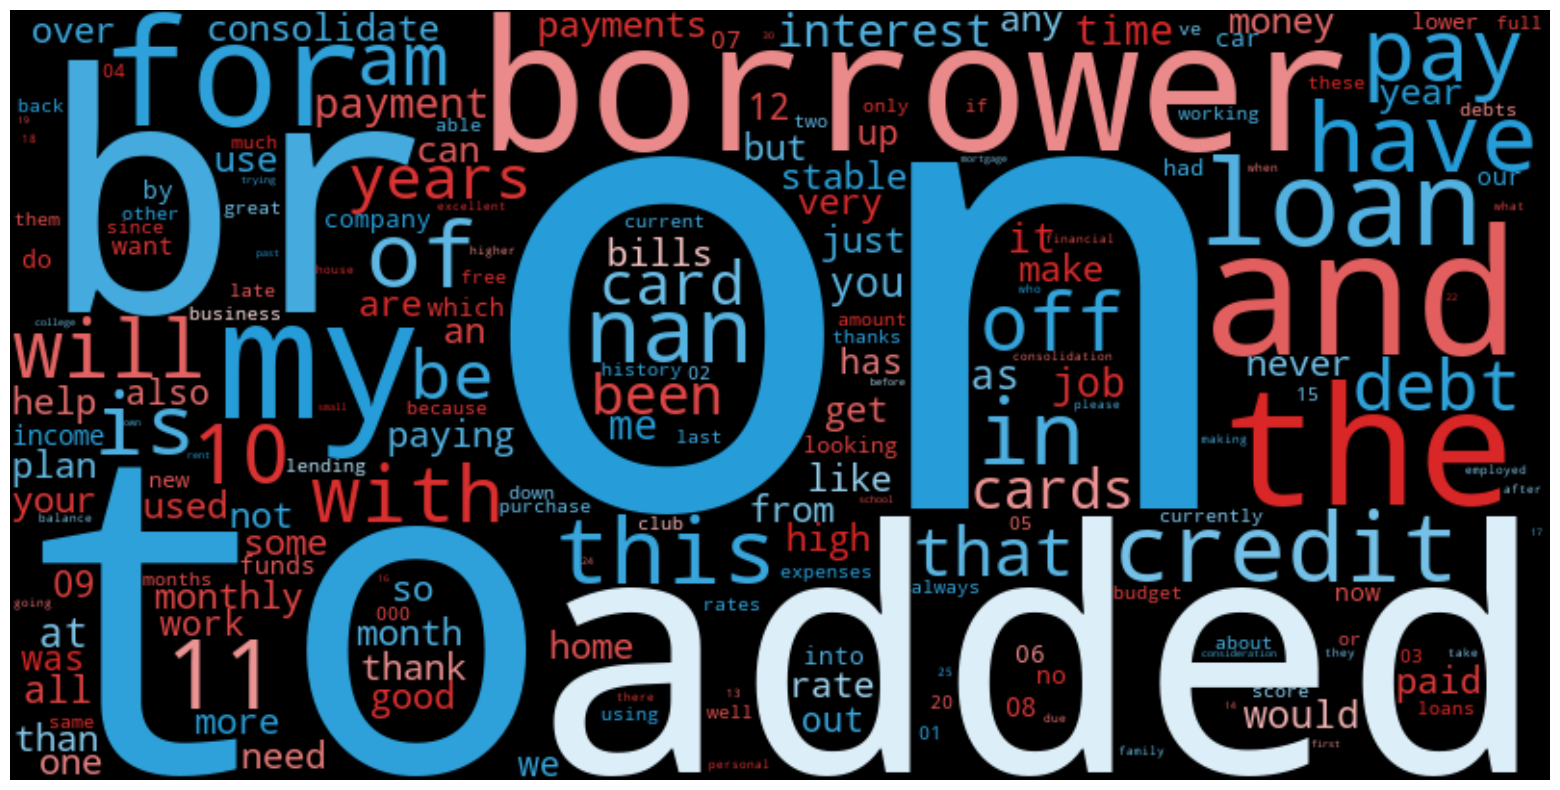

In [9]:
# ワードクラウドで可視化する。
# 閾値を設けてある一定の頻度のものだけ表示にしてもいいかも
# 今後Stopword除去も配慮する
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary where keys are words and values are corresponding wordcounts
wordcounts = dict(zip(df_word_summary['features'], df_word_summary['wordcounts']))

# Define a color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    coef = df_word_summary[df_word_summary['features'] == word]['coefs'].values[0]
    if coef > 0:
        return "hsl(0, 70%%, %d%%)" % (50 + coef * 100) # adjust these numbers to change color
    else:
        return "hsl(200, 70%%, %d%%)" % (50 - coef * 100) # adjust these numbers to change color

wordcloud = WordCloud(width=800, height=400, color_func=color_func,
                      prefer_horizontal=1.0).generate_from_frequencies(wordcounts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# making all features
class RunBlocks(Base):
    def __init__(self):
        self.feature_blocks = [*[ordinal_encoding_based_on_frequency_encoding(col) for col in
                    ["grade", "sub_grade","emp_length","home_ownership","verification_status",
                     "purpose","zip_code","addr_state",]]]
        self.stacked_predict_feature = [*[text_out_of_fold_prediction(col) for col in ["desc","title"]]]
        self.use_original_values = ["id","loan_amnt","funded_amnt","funded_amnt_inv","term",
                                "int_rate","installment","annual_inc"]
        
    def fit(self,input_df, df_y):
        output_df = pd.DataFrame()
        output_df = input_df[self.use_original_values]
                
        for block in self.feature_blocks:
            output_i = block.fit(input_df)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
        
        for block in self.stacked_predict_feature:
            output_i = block.fit(input_df,df_y)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
        return output_df
    
    def transform(self,input_df):
        output_df = pd.DataFrame()
        output_df = input_df[self.use_original_values]
        
        for block in self.feature_blocks:
            output_i = block.transform(input_df)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
            
        for block in self.stacked_predict_feature:
            output_i = block.transform(input_df)
            assert len(input_df) == len(output_i), block
            output_df = pd.concat([output_df,output_i],axis=1)
        return output_df
        
run_blocks = RunBlocks()
train = run_blocks.fit(df_train, df_train_y)
test = run_blocks.transform(df_test)
train



CV Score of Fold_0 is 0.5685629353208876
CV Score of Fold_1 is 0.5695402777405835
CV Score of Fold_2 is 0.5813628519877349
CV Score of Fold_3 is 0.5814703263980208
CV Score of Fold_4 is 0.577724768486729
mean score is 0.5757322319867912
CV Score of Fold_0 is 0.5625625917454967
CV Score of Fold_1 is 0.5509676106008061
CV Score of Fold_2 is 0.5548534095778155
CV Score of Fold_3 is 0.5615319559696803
CV Score of Fold_4 is 0.5560299427244644
mean score is 0.5571891021236526


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,ordinal_grade,ordinal_sub_grade,ordinal_emp_length,ordinal_home_ownership,ordinal_verification_status,ordinal_purpose,ordinal_zip_code,ordinal_addr_state,predicted_desc,predicted_title
0,659611,6300,6300,6300.000000,60,13.06,143.54,99840.0,4,27,1.0,3,0,10,742,46,0.413876,0.544609
1,406054,10000,10000,9989.853582,36,9.32,319.47,23700.0,5,33,10.0,4,1,13,808,49,0.381669,0.530540
2,1038943,25450,25450,25450.000000,60,21.28,692.53,82000.0,1,8,4.0,3,1,9,527,28,0.368966,0.530470
3,468920,8000,8000,8000.000000,36,13.22,270.41,94965.0,4,27,7.0,3,2,13,662,39,0.236025,0.505696
4,390159,7500,7500,6613.618548,36,15.05,260.19,234600.0,3,17,5.0,3,0,11,808,49,0.500675,0.512962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,69168,5000,5000,4975.000000,36,15.13,173.65,60000.0,2,11,8.0,4,1,9,101,23,0.631160,0.456278
30857,768946,8000,8000,8000.000000,60,20.25,213.07,31200.0,1,9,5.0,4,0,13,447,23,0.473246,0.523505
30858,813605,8000,8000,8000.000000,36,15.99,281.22,42000.0,3,22,2.0,4,0,13,674,42,0.494572,0.529091
30859,823038,10000,10000,10000.000000,36,10.99,327.34,70000.0,6,34,9.0,2,0,13,596,48,0.494572,0.543990


モデリング

In [11]:
import lightgbm as lgb

class Config():
    random_seed = 71
    remove_columns=["id"]
    target_col="target"
    cv_fold=5
    early_stopping_rounds=100
    
    lgb_params = {'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': random_seed,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': 'warn',
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}

    
config = Config()
skf = StratifiedKFold(n_splits=config.cv_fold, shuffle=True, random_state=config.random_seed)
models =[]
use_cols = [col for col in train.columns if col not in config.remove_columns]


for k, (train_idx, valid_idx) in enumerate(skf.split(train, df_train_y)):
    print(f"CV fold{k}")
    X_train, y_train = train.loc[train_idx,use_cols], df_train_y[train_idx]
    X_valid, y_valid = train.loc[valid_idx,use_cols], df_train_y[valid_idx]
    model = lgb.LGBMClassifier(**config.lgb_params, early_stopping_rounds=config.early_stopping_rounds)
    callbacks = [lgb.early_stopping(config.early_stopping_rounds)]
    
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=callbacks)
    # models.append(model)
    
    

CV fold0
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
CV fold1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[28]	valid_0's binary_logloss: 0.387777
CV fold2
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.377297
CV fold3
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[35]	valid_0's binary_logloss: 0.382878
CV fold4
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[56]	valid_0's binary_logloss: 0.379543


: 